In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from importkickdata import loadkickdata

# Function loads and cleans kicking data from profootballreference.com
kicks = loadkickdata('kickingdata.csv')

In [58]:
kicks = pd.concat([kicks, pd.get_dummies(kicks.PlayerID)], axis=1)

In [63]:
kicks.columns

Index(['Date', 'Tm', 'At', 'Opp', 'Result', 'Player', 'Dist', 'Good?', 'Blk?',
       'Home', 'PlayerID', 'Stadium', 'Dist_sq', 'Season', 'Month', 'BadgMi00',
       'BailDa00', 'BoswCh00', 'BullRa00', 'ButkHa00', 'CarlDa00', 'CataCh00',
       'CoonTr00', 'CrosMa20', 'ElliJa03', 'FairKa01', 'FickSa00', 'FolkNi20',
       'ForbKa00', 'GanoGr44', 'GayxMa00', 'GonzZa00', 'GostSt20', 'HausSt00',
       'HekkJo00', 'HopkDu00', 'JoseGr00', 'KooxYo00', 'LambJo00', 'LongTy00',
       'LutzWi00', 'MaheBr01', 'McCrMa00', 'McLaCh00', 'McMaBr01', 'MurrPa01',
       'MyerJa00', 'ParkCo03', 'PineEd00', 'PratMa20', 'RosaAl00', 'RoseNi00',
       'SandJa00', 'SantCa01', 'SeibAu00', 'SlyeJo00', 'SturCa00', 'SuccRy44',
       'TaveGi00', 'TuckJu00', 'VedvKa00', 'WalsBl00', 'ZuerGr00', 'barthco01',
       'bryanmat01', 'dawsophi01', 'gouldrob01', 'janikseb01', 'novaknic01',
       'nugenmik01', 'vinatada01', 'Constant'],
      dtype='object')

In [62]:
kicks.iloc[:,15:]
kicks['Constant'] = 1

In [89]:
kicks.head


<bound method NDFrame.head of             Date   Tm   At  Opp   Result                       Player  Dist  \
0     2019-11-11  SFO  NaN  SEA  L 24-27    Chase McLaughlin\McLaCh00    39   
1     2019-11-11  SFO  NaN  SEA  L 24-27    Chase McLaughlin\McLaCh00    47   
2     2019-11-11  SEA    @  SFO  W 27-24         Jason Myers\MyerJa00    42   
3     2019-11-11  SFO  NaN  SEA  L 24-27    Chase McLaughlin\McLaCh00    43   
4     2019-11-11  SFO  NaN  SEA  L 24-27    Chase McLaughlin\McLaCh00    47   
5     2019-11-11  SEA    @  SFO  W 27-24         Jason Myers\MyerJa00    46   
6     2019-11-10  ARI    @  TAM  L 27-30       Zane Gonzalez\GonzZa00    54   
7     2019-11-10  TAM  NaN  ARI  W 30-27            Matt Gay\GayxMa00    41   
8     2019-11-10  KAN    @  TEN  L 32-35     Harrison Butker\ButkHa00    43   
9     2019-11-10  ATL    @  NOR   W 26-9        Younghoe Koo\KooxYo00    48   
10    2019-11-10  MIN    @  DAL  W 28-24          Dan Bailey\BailDa00    27   
11    2019-11-10  GNB 

In [108]:
kicks_train = kicks[(kicks.Date < datetime.date(2018,12,9))]


y = kicks_train['Good?']
X = pd.concat([kicks_train.Dist, kicks_train.Constant, pd.get_dummies(kicks_train.PlayerID)], axis=1)
X = X.iloc[:,:-1]

probit = sm.Probit(y, X)
probit_res = probit.fit(maxiter=1000)
probit_me = probit_res.get_margeff()
probit_me.summary()

         Current function value: 0.350705
         Iterations: 1000


//anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                  Good?
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dist          -0.0119      0.001    -14.157      0.000      -0.014      -0.010
BadgMi00       0.0748      0.126      0.595      0.552      -0.172       0.321
BailDa00      -0.0663      0.060     -1.101      0.271      -0.184       0.052
BoswCh00       0.0193      0.062      0.310      0.757      -0.103       0.141
BullRa00      -0.0155      0.068     -0.227      0.821      -0.149       0.118
ButkHa00       0.0853      0.065      1.306      0.192      -0.043       0.213
CarlDa00      -0.0541      0.083     -0.651      0.515      -0.217       0.109
CataCh00      -0.0260      0.061     -0.425      0.671      -0.146       0.094
CoonTr00      -0.0624      0.127     -0.493      0.622      -0.311       0.186
CrosMa20      -0.0363      0.060     -0.607      0.544      -0.154       0.081
ElliJa03       0.0039      0.059      0.065      0.948      -0.113       0.120
FairKa01       0.0043      0.059      0.074      0.941      -0.111       0.119
FickSa00      -0.2989      0.115     -2.603      0.009      -0.524      -0.074
FolkNi20      -0.1633      0.090     -1.807      0.071      -0.340       0.014
ForbKa00       0.0259      0.067      0.384      0.701      -0.106       0.158
GanoGr44       0.1179      0.075      1.577      0.115      -0.029       0.264
GonzZa00      -0.0758      0.067     -1.125      0.261      -0.208       0.056
GostSt20       0.0562      0.062      0.903      0.366      -0.066       0.178
HausSt00       0.0939      0.064      1.457      0.145      -0.032       0.220
HekkJo00       0.8271   4474.537      0.000      1.000   -8769.105    8770.759
HopkDu00       0.0373      0.068      0.547      0.584      -0.096       0.171
JoseGr00       0.0072      0.100      0.071      0.943      -0.190       0.204
KooxYo00      -0.2132      0.114     -1.863      0.063      -0.438       0.011
LambJo00       0.1116      0.074      1.500      0.134      -0.034       0.258
LutzWi00       0.0719      0.063      1.148      0.251      -0.051       0.195
MaheBr01       0.0311      0.074      0.419      0.675      -0.114       0.177
McCrMa00      -0.1414      0.101     -1.404      0.160      -0.339       0.056
McMaBr01      -0.0385      0.059     -0.655      0.512      -0.154       0.077
MurrPa01       0.0012      0.080      0.014      0.988      -0.155       0.157
MyerJa00       0.0610      0.065      0.941      0.347      -0.066       0.188
ParkCo03       0.0072      0.063      0.114      0.909      -0.117       0.131
PratMa20       0.0656      0.062      1.058      0.290      -0.056       0.187
RosaAl00       0.0006      0.062      0.010      0.992      -0.120       0.121
RoseNi00      -0.0636      0.091     -0.700      0.484      -0.242       0.114
SandJa00       0.1218      0.111      1.101      0.271      -0.095       0.339
SantCa01       0.0084      0.101      0.084      0.933      -0.189       0.206
SturCa00      -0.0399      0.084     -0.475      0.635      -0.205       0.125
SuccRy44       0.0251      0.058      0.432      0.666      -0.089       0.139
TaveGi00      -0.0052      0.072     -0.072      0.942      -0.146       0.136
TuckJu00       0.1327      0.066      2.021      0.043       0.004       0.261
WalsBl00      -0.0792      0.067     -1.185      0.236      -0.210       0.052
ZuerGr00       0.1309      0.069      1.909      0.056      -0.004       0.265
barthco01     -0.0725      0.082     -0.886      0.376      -0.233       0.088
bryanmat01     0.1014      0.064      1.583      0.113      -0.024       0.227
dawsophi01    -0.0594      0.059     -1.005      

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2519    1
2520    1
2521    1
2522    1
2523    1
2524    1
2525    1
2526    1
2527    1
2528    1
2529    1
2530    1
2531    1
2532    1
2533    1
2534    1
2535    1
2536    1
2537    1
2538    1
2539    1
2540    1
2541    1
2542    1
2543    1
2544    1
2545    1
2546    1
2547    1
2548    1
Name: Constant, Length: 2549, dtype: int64

In [102]:
pd.get_dummies(kicks_train.PlayerID).shape

(1751, 49)

In [129]:
X.columns[19]

'HausSt00'

In [125]:
X.shape

(1751, 50)

In [136]:
shaus = kicks[kicks.PlayerID=='HausSt00']
shaus19 = shaus[shaus.Season==2019]
X_shaus19 = shaus19[['Dist', 'Constant']]
y_shaus19 = shaus19['Good?']

In [137]:
for c in range(2,50):
    X_shaus19[c] = 0

X_shaus19[19] = 1


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [138]:
X_shaus19[19]

17     1
46     1
96     1
172    1
188    1
202    1
219    1
380    1
400    1
420    1
439    1
458    1
551    1
Name: 19, dtype: int64

In [151]:
y_shaus19

17     False
46     False
96      True
172    False
188     True
202     True
219     True
380    False
400     True
420    False
439     True
458     True
551     True
Name: Good?, dtype: bool

In [140]:
X_shaus19

,Dist,Constant,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
17,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400,46,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,62,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
problist = list(probit_res.predict(X_shaus19))

In [146]:
problist

[0.967991048707445,
 0.7550755418929063,
 0.9135587439115529,
 0.7550755418929063,
 0.9389954817787187,
 0.8809211857099661,
 0.9035192603960969,
 0.8251256201153645,
 0.8683173588060045,
 0.5558130431777355,
 0.8809211857099661,
 0.967991048707445,
 0.9035192603960969]

In [147]:
kicksim = pd.DataFrame()
for i in range(13):
    col_name = 'kick ' + str(i+1)
    kicksim[col_name] = pd.Series(np.random.choice([1,0], p=[problist[i],1-problist[i]], size=1000))

kicksim.describe()

,kick 1,kick 2,kick 3,kick 4,kick 5,kick 6,kick 7,kick 8,kick 9,kick 10,kick 11,kick 12,kick 13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.970000,0.772000,0.889000,0.760000,0.948000,0.895000,0.902000,0.814000,0.87800,0.572000,0.887000,0.968000,0.893000
std,0.170673,0.419753,0.314289,0.427297,0.222138,0.306707,0.297463,0.389301,0.32745,0.495036,0.316751,0.176088,0.309268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


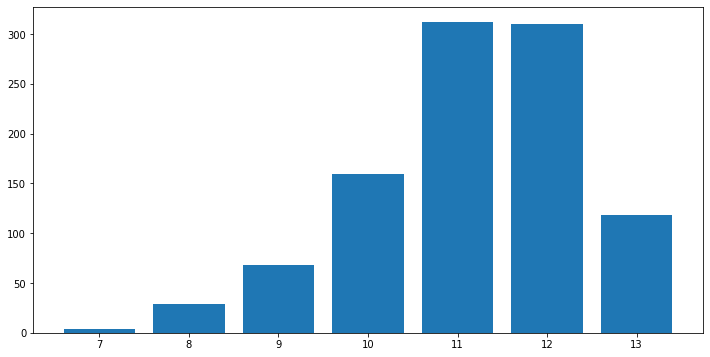

In [148]:
kicksim['Kicks made'] = 0

for k in range(kicksim.shape[0]):
    kicksim.loc[k, 'Kicks made'] = sum(kicksim.iloc[k,:])
    
plt.figure(figsize=(12,6))
plt.bar(kicksim['Kicks made'].value_counts().index, kicksim['Kicks made'].value_counts())
plt.show()

In [150]:
sum(kicksim['Kicks made'] <= 8)

33